In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
advertisingdata=pd.read_csv('Advertising.csv')

In [4]:
df=pd.DataFrame(advertisingdata)

In [5]:
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

* Data consists of a column with serial No. which can be dropped

In [9]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

In [10]:
df.drop(["a"], axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

* There are no missing values in the data

<AxesSubplot:xlabel='TV'>

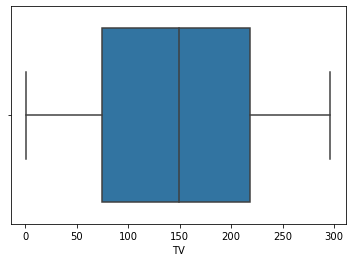

In [12]:
sns.boxplot(df['TV'])

<AxesSubplot:xlabel='radio'>

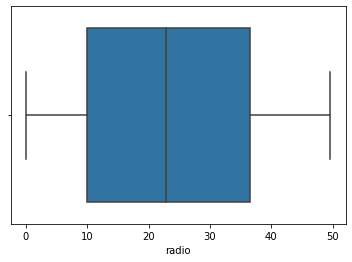

In [15]:
sns.boxplot(df['radio'])

<AxesSubplot:xlabel='newspaper'>

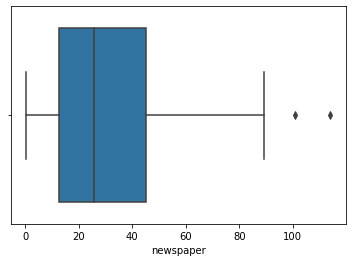

In [17]:
sns.boxplot(df['newspaper'])

* Outliers present in newspaper data

<AxesSubplot:xlabel='sales', ylabel='Count'>

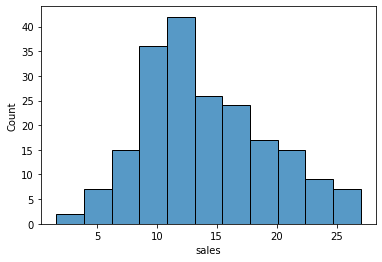

In [19]:
sns.histplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='sales'>

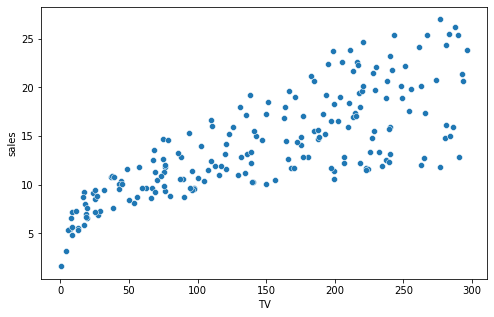

In [20]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='TV', y='sales', data=df)

* We can see that sales increased with TV advertisment

<AxesSubplot:xlabel='sales', ylabel='radio'>

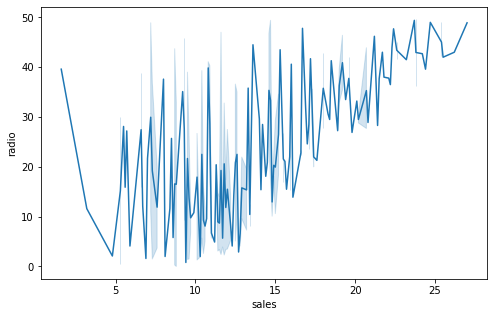

In [27]:
plt.figure(figsize = (8,5))
sns.lineplot(x='sales', y='radio', data=df)

* sales data is scatterred with radio advertisements

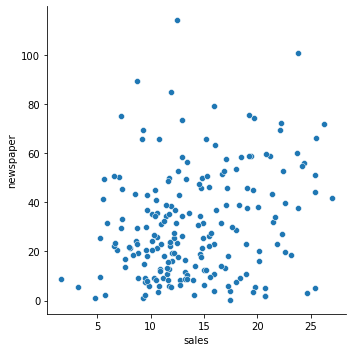

In [29]:
sns.relplot(x='sales', y='newspaper', data=df)

* sales data is scatterred with newspaper advertisements and has no any linear growth

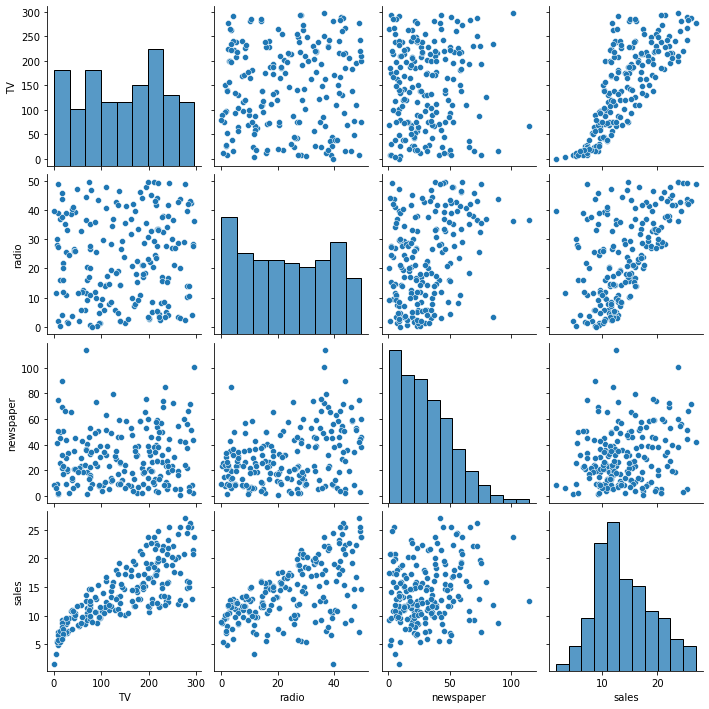

In [30]:
sns.pairplot(df)

In [31]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


* we can observe that data  is not much skewed
* There is a high gap between 75% percentile and max in all the columns outliers are present
* the difference is high in between mean and std in TV, radio, newspaper, sales and hence the data is highly spreaded

In [33]:
#Checking for outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [34]:
Threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [35]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [36]:
print("old data shape : " ,df.shape)
print("New data shape after removing outliers : ",df_new.shape)

old data shape :  (200, 4)
New data shape after removing outliers :  (198, 4)


In [37]:
df_new.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


<AxesSubplot:>

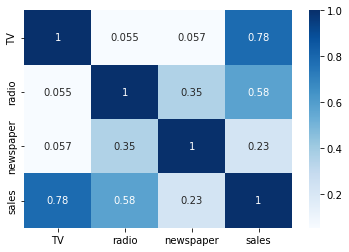

In [39]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

* We can see that sales has higher correlation with TV
* And sales has lesser correlation with newspaper

In [41]:
# Checking for multicolinearity

x=df_new.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [42]:
y=df_new.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [44]:
vif_calc()

   VIF Factor   Features
0    2.502183         TV
1    3.275285      radio
2    3.126386  newspaper


* The data is not causing any high multicolinearity

In [45]:
x.shape,y.shape

((198, 3), (198,))

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [47]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((148, 3), (148,), (50, 3), (50,))

In [48]:
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()

In [49]:
model=[lm,DTR,KNR,svr]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))

Score of  LinearRegression() is : 0.8965725335855813
Errors of  LinearRegression() is
Mean absolute error : 1.3700158302961696
Mean squared error : 3.4546804748774775
Root mean squared error : 1.858677076545971
Score of  DecisionTreeRegressor() is : 1.0
Errors of  DecisionTreeRegressor() is
Mean absolute error : 0.936
Mean squared error : 1.3727999999999994
Root mean squared error : 1.1716654812701446
Score of  KNeighborsRegressor() is : 0.9462487444492599
Errors of  KNeighborsRegressor() is
Mean absolute error : 1.1428
Mean squared error : 2.9073360000000004
Root mean squared error : 1.7050911999069143
Score of  SVR() is : 0.8391846205536798
Errors of  SVR() is
Mean absolute error : 1.5880625943264632
Mean squared error : 4.894812652217652
Root mean squared error : 2.212422349421026


* Score of Decission tree can be considered best as it is 1.0

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
model=[lm,DTR,KNR,svr]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())

score of  LinearRegression() is : [0.90951924 0.74151247 0.91579119 0.9186864  0.88586728]
score mean of  LinearRegression() is : 0.8742753156257497
score std of  LinearRegression() is : 0.06737713724977183
score of  DecisionTreeRegressor() is : [0.94658598 0.89828984 0.927723   0.94062833 0.91607834]
score mean of  DecisionTreeRegressor() is : 0.9258610991366965
score std of  DecisionTreeRegressor() is : 0.017360501558663397
score of  KNeighborsRegressor() is : [0.91275635 0.84953359 0.89253951 0.87652014 0.93374714]
score mean of  KNeighborsRegressor() is : 0.8930193446844121
score std of  KNeighborsRegressor() is : 0.029023324024994104
score of  SVR() is : [0.7927155  0.76885312 0.79314871 0.69471615 0.78317556]
score mean of  SVR() is : 0.766521809600661
score std of  SVR() is : 0.03697008585751954


In [52]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV

In [53]:
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}

In [54]:
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [55]:
grd.best_params_

{'criterion': 'friedman_mse'}

In [56]:
grd.best_score_

0.9187608597331876

In [57]:
from sklearn.linear_model import Ridge
param_alpha={'alpha':[.0001,.001,.01,.1]}
rd=Ridge()
gd=GridSearchCV(estimator=rd,param_grid=param_alpha,cv=5)
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [58]:
gd.best_score_

0.8742754055771119

In [59]:
gd.best_params_

{'alpha': 0.1}

*DTR model gives the best results, we can save this model

In [60]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
dtr.score(x_train,y_train)

1.0

In [62]:
pred=dtr.predict(x_test)

In [63]:
print("Predicted values :",pred)

Predicted values : [ 8.8 12.9 22.2  9.7  5.3 23.8 19.6 12.4 14.5 14.8 12.9 18.5  5.3 13.2
  8.7 10.6  5.3 11.4  9.6 11.8 11.8 19.  25.4  8.5 17.4 21.7  8.5 12.5
  8.5 12.6 19.  15.2  8.7 11.8 12.8 19.  15.6 12.6 18.9 16.6 19.   5.3
 12.9 11.3  8.5  8.5 18.  17.4  8.5 27. ]


In [64]:
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared error :",mean_squared_error(y_test,pred))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error : 0.9300000000000002
Mean squared error : 1.3773999999999995
Root mean squared error : 1.173626857225072


In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9521082188749667


In [66]:
#predicting sales by giving new inputs
x=np.array([17.2,45.9,69.3])
x

array([17.2, 45.9, 69.3])

In [67]:
x.shape

(3,)

In [70]:
x=x.reshape(1,-1)

In [71]:
x.shape

(1, 3)

In [72]:
dtr.predict(x)

array([9.3])

In [73]:
import pandas as pd
df1=pd.DataFrame(pred)
df1.to_csv('Advertising_sales.csv')